In [2]:
#mengimport library-library yang akan digunakan dalam program dan ada yang diberikan nama alias dengan keyword as untuk penyingkatan penulisan
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
#mengimport gambar dengan cv2 untuk dilakukan konversi ke gray image
img = cv.imread('osita-noise.jpeg')
#mengkonversi gambar miguel_cv2 ke gray image dan ditampung di img
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

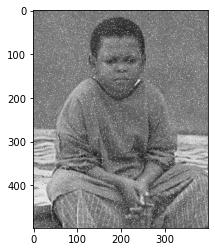

In [4]:
#meanmpilkan gambar
plt.imshow(img, cmap='gray')

In [5]:
#tampilkan hasil 3 gambar
def show_img4(w, h, citra1, citra2, citra3, citra4, caption1, caption2, caption3, caption4):  
    #memanggil fungsi figure dengan lebar dan tinggi mengikuti ukuran w dan h
    plt.figure(figsize=(w,h))
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 4 dan urutan ke-1
    plt.subplot(1,4,1)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption1, fontsize=10, color="green")
    #menampilkan gambar imagebaru dengan hanya menggunakan warna hitam dan putih
    plt.imshow(citra1, cmap="gray")
    #menampilkan gambar imagebaru dengan hanya menggunakan warna hitam dan putih
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 4 dan urutan ke-2
    plt.subplot(1,4,2)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption2, fontsize=10, color="green")
    #menampilkan gambar imagebaru dengan hanya menggunakan warna hitam dan putih
    plt.imshow(citra2, cmap="gray")
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 4 dan urutan ke-3
    plt.subplot(1,4,3)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption3, fontsize=10, color="green")
    #menampilkan gambar
    plt.imshow(citra3, cmap="gray")
    #memanggil library matplotlib function subplot untuk membuat tabel dengan baris berjumlah 1 dan kolom berjumlah 4 dan urutan ke-4
    plt.subplot(1,4,4)
    #menampilkan keterangan gambar yang terdiri dari label, ukuran font dan warna
    plt.title(label=caption4, fontsize=10, color="green")
    #menampilkan gambar
    plt.imshow(citra4, cmap="gray")

In [6]:
#menampilkan array dari intensitas gambar
print(img)

[[120 120 120 ... 117 118 118]
 [122 121 119 ... 119 117 116]
 [117 120 123 ... 114 120 118]
 ...
 [135 125 117 ... 101  95  92]
 [129 128 126 ...  73  72  69]
 [129 128 126 ...  57  57  54]]


In [7]:
#menampilkan ukuran gambara
img.shape

(498, 400)

Median filtering

In [8]:
#menentukan median dengan menggunakan rumus median yang sebelumnya nilai dari matriks gambar diurutkan
#terlebih dahulu
def Median (matriks) :
    array = np.sort (matriks, axis = None)
    total = len (array)
    return (array [int ((total-1)/2)])

#hasil yang didapatkan dari fungsi diatas kemudian dilakukan perulangan pada tinggi 
#dan lebar untuk menghitung median dari gambar yang dimasukkan, nilai horizontal dan nilai vertikal
def Medianfilter(image, horizontal, vertikal):
    tinggi, lebar = image.shape
    result = np.zeros(image.shape)
    horizontal2, vertikal2 = int ((horizontal-1)/2), int ((vertikal-1)/2)
    pad = np.pad (image, ((horizontal2,horizontal-horizontal2-1),(vertikal2,vertikal-vertikal2-1)), "edge" )
    for i in range (tinggi):
        for j in range (lebar):
            result[i,j] = Median(pad[i:i+horizontal, j:j+vertikal])
    return result

In [9]:
#Median 3x3
median3x3 = Medianfilter(img, 3,3)
#Median 5x5
median5x5 = Medianfilter(img, 5,5)
#Median 7x7
median7x7 = Medianfilter(img, 7,7)

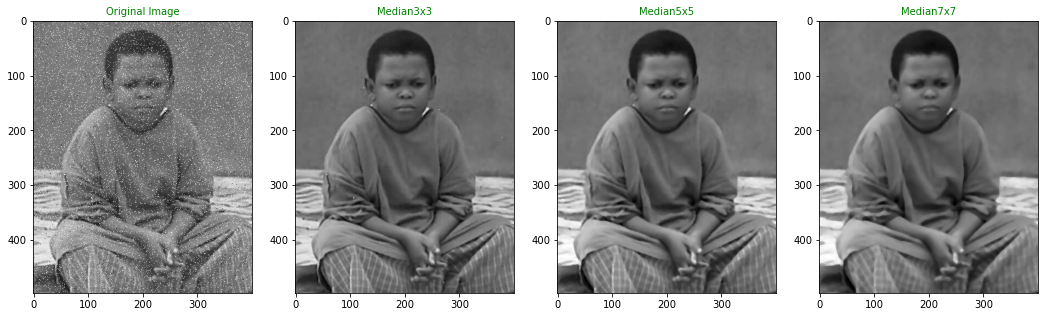

In [10]:
#menampilkan 4 buah gambar
show_img4(18,15, img, median3x3, median5x5, median7x7, "Original Image", "Median3x3", "Median5x5", "Median7x7")

Mean Filtering

In [11]:
#menentukan mean dengan menggunakan rumus mean yang sebelumnya nilai dari matriks gambar diurutkan
#terlebih dahulu
def Mean (matriks) :
    array = np.sum (matriks)
    horizontal, vertikal = matriks.shape
    return (array/(horizontal*vertikal))

#hasil yang didapatkan dari fungsi diatas kemudian dilakukan perulangan pada tinggi 
#dan lebar untuk menghitung mean dari gambar yang dimasukkan, nilai horizontal dan nilai vertikal
def Meanfilter(image, horizontal, vertikal):
    tinggi, lebar = image.shape
    result = np.zeros(image.shape)
    horizontal2, vertikal2 = int ((horizontal-1)/2), int ((vertikal-1)/2)
    pad = np.pad (image, ((horizontal2,horizontal-horizontal2-1),(vertikal2,vertikal-vertikal2-1)) , "edge" )
    for i in range (tinggi):
        for j in range (lebar):
            result[i,j] = Mean(pad[i:i+horizontal, j:j+vertikal])
    return result

In [12]:
#Mean 3x3
mean3x3 = Meanfilter(img, 3,3)
#Mean 5x5
mean5x5 = Meanfilter(img, 5,5)
#Mean 7x7
mean7x7 = Meanfilter(img, 7,7)

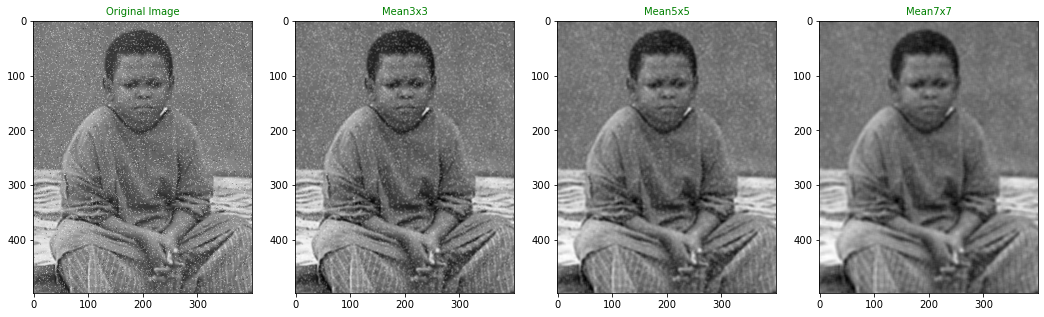

In [13]:
#menampilkan 4 buah gambar
show_img4(18,15, img, mean3x3, mean5x5, mean7x7, "Original Image", "Mean3x3", "Mean5x5", "Mean7x7")

Modus Filtering

In [14]:
#menentukan modus yang sebelumnya nilai dari matriks gambar diurutkan
#terlebih dahulu kemudian menghitung angka yang sering muncul kemudian dlakukan pengcekan 
#terhadap angka yang sering muncul tersebut
def Modus(matriks):
    array = np.sort (matriks, axis=None)
    indeks = np.zeros (np.max(array)+1, dtype= int)
    for i in range (len(array)):
        indeks[array[i]] += 1
        
    cek = np.max(indeks)
    for j in range (len(indeks)):
        if (indeks[j] == cek):
            return j
 
#hasil yang didapatkan dari fungsi diatas kemudian dilakukan perulangan pada tinggi 
#dan lebar untuk menghitung median dari gambar yang dimasukkan, nilai horizontal dan nilai vertikal       
def Modusfilter(image, horizontal, vertikal):
    tinggi,lebar = image.shape
    result = np.zeros(image.shape)
    horizontal2, vertikal2 = int ((horizontal-1)/2), int ((vertikal-1)/2)
    pad = np.pad (image, ((horizontal2,horizontal-horizontal2-1),(vertikal2,vertikal-vertikal2-1)) , "edge" )
    for i in range (tinggi):
        for j in range (lebar):
            result[i,j] = Modus(pad[i:i+horizontal, j:j+vertikal])
    return result

In [15]:
#Modus 3x3
modus3x3 = Modusfilter(img, 3,3)
#Modus 5x5
modus5x5 = Modusfilter(img, 5,5)
#Modus 7x7
modus7x7 = Modusfilter(img, 7,7)

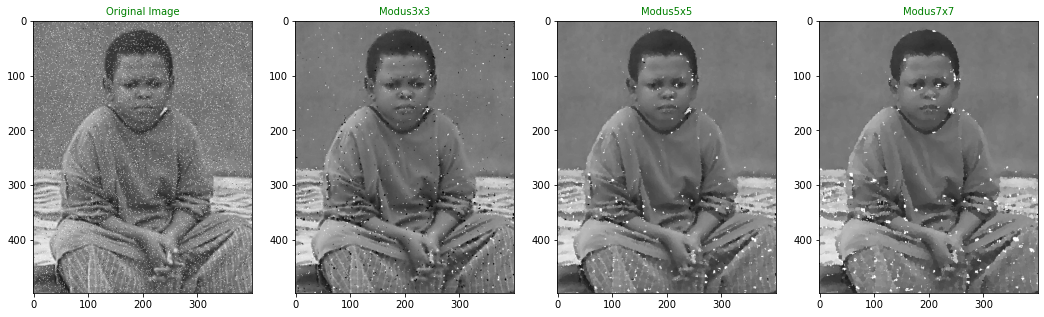

In [16]:
#menampilkan 4 buah gambar
show_img4(18,15, img, modus3x3, modus5x5, modus7x7, "Original Image", "Modus3x3", "Modus5x5", "Modus7x7")